<a href="https://colab.research.google.com/github/johnberg1/COMP447-547-S22/blob/main/homework1/HW1_Autoregressive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

## Overview
This semester, all homeworks will be conducted through Google Colab notebooks. All code for the homework assignment will be written and run in this notebook. Running in Colab will automatically provide a GPU, but you may also run this notebook locally by following [these instructions](https://research.google.com/colaboratory/local-runtimes.html) if you wish to use your own GPU.

You will save images in the notebooks to use and fill out a given LaTeX template which will be submitted to Blackboard, along with your notebook code.

## Using Colab
On the left-hand side, you can click the different icons to see a Table of Contents of the assignment, as well as local files accessible through the notebook.

Make sure to go to **Runtime -> Change runtime type** and select **GPU** as the hardware accelerator. This allows you to use a GPU. Run the cells below to get started on the assignment. Note that a session is open for a maximum of 12 hours, and using too much GPU compute may result in restricted access for a short period of time. Please start the homework early so you have ample time to work.

**If you loaded this notebook from clicking "Open in Colab" from github, you will need to save it to your own Google Drive to keep your work.**

## General Tips
In the first problem, you will implement an autoregressive model and run it on two datasets (dataset 1 and dataset 2). The expected outputs for dataset 1 are already provided to help as a sanity check. In the second problem, you will train on one dataset (MNIST).

After each part, there will be a written question that you will need to answer about that part. These questions are given under the **Inline Question** title. You just need to write your answers below those questions.

Feel free to print whatever output (e.g. debugging code, training code, etc) you want. Your graded submission will be the report you submit together with a copy of your notebook.

You will be implementing the code using PyTorch. Some parts of the code such as function headers are already provided to you, you will need to fill out the parts with "YOUR CODE HERE". Feel free to create more cells and more functions or modify the existing ones if you wish.

After you complete the assignment, download all of the image outputted in the results/ folder (which you can find on the left dashboard by clicking the folder icon) and upload them to the figure folder in the given latex template.

Run the cells below to download and load up the starter code.

In [ ]:
!if [ -d deepul ]; then rm -Rf deepul; fi 
!git clone https://github.com/johnberg1/deepul.git
!unzip -qq deepul/homeworks/hw1/data/hw1_data.zip -d deepul/homeworks/hw1/data/
!pip install ./deepul

In [ ]:
from deepul.hw1_helper import *

# Question 1: 1D Data

In this question, we will train simple generative models on discrete 1D data.

Execute the cell below to visualize our datasets

In [ ]:
visualize_q1_data(dset_type=1)
visualize_q1_data(dset_type=2)

## Part (a) Fitting a Histogram (5 Points)

Let $\theta = (\theta_0, \dots, \theta_{d-1}) \in \mathbb{R}^d$ and define the model $p_\theta(x) = \frac{e^{\theta_x}}{\sum_{x'}e^{\theta_{x'}}}$

Fit $p_\theta$ with maximum likelihood via stochastic gradient descent on the training set, using $\theta$ initialized to zero. Use your favorite version of stochastic gradient descent, and optimize your hyperparameters on a validation set of your choice.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. Plot the model probabilities in a bar graph with $\{0,\dots,d-1\}$ on the x-axis and a real number in $[0,1]$ on the y-axis.




### Solution
Fill out the functions below and return the necessary arguments. Feel free to create more cells if need be.

Implement the Histogram class which extends nn.Module, you will need to create the parameters of the model and provide a loss given a batch of data. In the get_distribution function, you will return a valid probability distribution which sums up to 1. You may want to take a look at the documentations of torch.nn.functional.cross_entropy() and torch.nn.functional.softmax()

After creating your model, you will train your model on the training set and evaluate on the test set. 

**Hint**: You may want to implement training and the evaluation procedures as functions which take a model and the dataloaders as an input and return the losses. This way, you can use these functions to train all the models you will create in this homework by simply calling them from inside the necessary functions such as 'q1_a' or 'q1_b'

In [ ]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [ ]:
class Histogram(nn.Module):
  def __init__(self, d):
    super().__init__()
    """ YOUR CODE HERE """

  def loss(self, x):
    """ YOUR CODE HERE """

  def get_distribution(self):
    """ YOUR CODE HERE """

In [ ]:
def q1_a(train_data, test_data, d, dset_id):
  """
  train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
  test_data: An (n_test,) numpy array of integers in {0, .., d-1}
  d: The number of possible discrete values for random variable x
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (d,) of model probabilities
  """
  
  """ YOUR CODE HERE """

### Results

Once you've implemented `q1_a`, execute the cells below to visualize and save your results



Final Test Loss: 2.0553


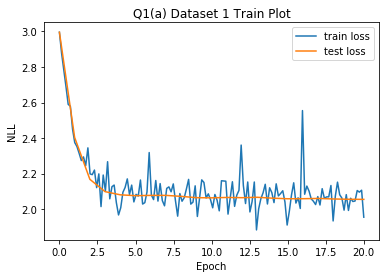

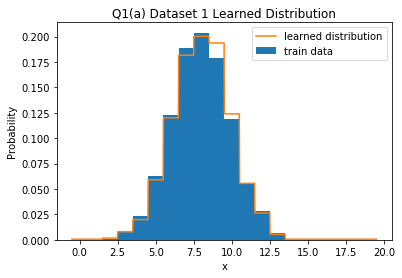

In [ ]:
q1_save_results(1, 'a', q1_a)

In [ ]:
q1_save_results(2, 'a', q1_a)

 ### <font color='red'> Inline Question 1 </font>

*   What is the number of parameters of your Histogram model, for dataset 1 and dataset 2?
*   Supose that you are implementing a Histogram to model 28x28 binary images (each pixel has value of {0,1}). How many parameters would this model need to have? Is this a feasible way to model image distributions?

<font color='red'> Your Answers </font>


## Part (b) Fitting Discretized Mixture of Logistics (5 Points)

Let us model $p_\theta(x)$ as a **discretized** mixture of 6 logistics such that $p_\theta(x) = \sum_{i=1}^6 \pi_i[\sigma((x+0.5 - \mu_i)/s_i) - \sigma((x-0.5-\mu_i)/s_i)]$

For the edge case of when $x = 0$, we replace $x-0.5$ by $-\infty$, and for $x = d-1$, we replace $x+0.5$ by $\infty$.

You may find the [PixelCNN++](https://arxiv.org/abs/1701.05517) helpful for more information on discretized mixture of logistics.

**Provide the same set of corresponding deliverables as part (a)**

### Solution
Fill out the functions below and return the necessary arguments. Feel free to create more cells if need be. 

Implement the MixtureOfLogistics class which extends nn.Module. Similar to the first part, you will create the parameters, implement the forward pass, loss functions and provide a function which returns a valid probability distribution.

Possible functions that might help: torch.sigmoid(), torch.clamp(), F.log_softmax()

In [ ]:
class MixtureOfLogistics(nn.Module):
  def __init__(self, d, n_mix=6):
    super().__init__()
    """ YOUR CODE HERE """

  def forward(self, x):
    """ YOUR CODE HERE """

  def loss(self, x):
    """ YOUR CODE HERE """

  def get_distribution(self):
    """ YOUR CODE HERE """

In [ ]:
def q1_b(train_data, test_data, d, dset_id):
  """
  train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
  test_data: An (n_test,) numpy array of integers in {0, .., d-1}
  d: The number of possible discrete values for random variable x
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (d,) of model probabilities
  """
  
  """ YOUR CODE HERE """

### Results

Once you've implemented `q1_b`, execute the cells below to visualize and save your results



Final Test Loss: 2.0586


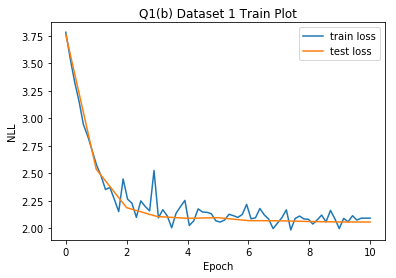

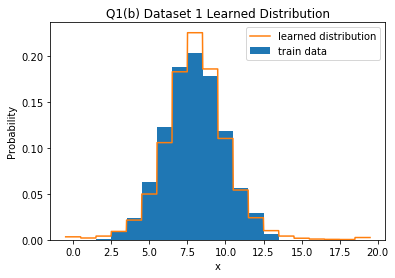

In [ ]:
q1_save_results(1, 'b', q1_b)

In [ ]:
q1_save_results(2, 'b', q1_b)

 ### <font color='red'> Inline Question 2 </font>

*   Please run the experiments **on dataset 2** with `n_mix = 2` and `n_mix = 4` again and observe the changes in the results. Are your results as good as the results with `n_mix = 6`? Why do you think this happens? Please explain briefly. (Note that for the report, **you need to include the results for** `n_mix = 6` **only**, the other experiments are just for you to observe).

<font color='red'> Your Answers </font>

# Question 2 PixelCNNs

Now, you will train more powerful PixelCNN model and its variations on MNIST. In the first part, you will implement a PixelCNN that is trained with the default Cross Entropy Loss. In the second part, you will implement the alternative loss proposed in PixelCNN++, mixture of logistics. In the final part, you will implement the gated version, GatedPixelCNN.

## Part (a) PixelCNN on MNIST (10 Points)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import os
import sys
from torch import optim
from torch.utils import data
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You will train your model on MNIST. Let's download the dataset and visualize an example:

In [ ]:
dataset_path = '/content/data'
transform = transforms.ToTensor()
train_data = datasets.MNIST(root=dataset_path,
                            train=True,
                            download=True,
                            transform=transform)
test_data = datasets.MNIST(root=dataset_path,
                            train=False,
                            download=True,
                            transform=transform)
print(train_data)

plt.imshow(train_data.data[447], cmap='gray')
plt.title('%i' % train_data.targets[447])
plt.axis('off')
plt.show()

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/data
    Split: Train
    StandardTransform
Transform: ToTensor()


### Solution

In this part, you will implement a very simple PixelCNN architecture on greyscale handwritten digits. This model will be trained with the default Cross Entropy Loss.

As you have seen in the lecture, PixelCNN utilizes masked convolutions to ensure the autoregressive property is satisfied. First start by implementing a masked convolutional layer. Remember that there are two different types of layers, type A and type B, depending on the masking you are using.

A class header is provided to you in the cell below, which extends the `nn.Conv2d` class. You may wish to implement your layer that extends the `nn.Module` class instead.

In [ ]:
class MaskedConv2d(nn.Conv2d):
  def __init__(self, mask_type, *args, **kwargs):
    """ YOUR CODE HERE """

  def forward(self, x):
    """ YOUR CODE HERE """

Now that you have implemented a masked convolutional layer, you can use this layer inside your PixelCNN model. Again, a class header is provided to you. Here is a pseudocode for the reference implementation:



```
class PixelCNN:
  MaskedConv(mask_type='A', in_channels = 1, out_channels = 64, kernel_size = 7, stride = 1, padding = 3)
  BatchNorm(num_features=64)
  ReLU()

  for _ in range(3):
    MaskedConv(mask_type='B', in_channels = 64, out_channels = 64, kernel_size = 7, stride = 1, padding = 3)
    BatchNorm(num_features=64)
    ReLU()

  MaskedConv(mask_type='B', in_channels = 64, out_channels = 64, kernel_size = 1)
  BatchNorm(num_features=64)
  ReLU()
  MaskedConv(mask_type='B', in_channels = 64, out_channels = 256, kernel_size = 1)

```



In [ ]:
class PixelCNN(nn.Module):
  def __init__(self, num_layers = 5, num_channels = 64, kernel_size = 7):
    """ YOUR CODE HERE """

  def forward(self, x):
    """ YOUR CODE HERE """

Now you are ready to train your model. Fill in the function `q2_a` below to train the model and return the correct deliverables. In this function, you will initialize your model and train this model. The reference implementation uses `batch_size = 128`, `num_epocs = 5`, `optimizer = Adam`, `lr = 1e-3` as hyperparameters. Use Cross Entropy Loss to train this model, please look at the documentation of this loss. It should take around 16 minutes to train for 5 epochs

**You will provide the following deliverables:**

*   **A list of training losses evaluated at every minibatch. (Create an empty list before training, append the loss after every minibatch and return the final list).**
*   **A list of test losses evaluated once at initialization and after each epoch. (Create an empty list. Evaluate on the test set before training and append it to this list. After every epoch, evaluate on the test set again and append to the list. Return the final list).**
*   **25 samples drawn from your trained model. (The sampling function is already provided to you. Just call this function after training and return the samples).**

Here is a pseudocode for the reference implementation. Once again, you may wish to implement a generic training function (`train_model`) that takes your model and dataloaders and returns the training losses:


```
function q2a():
  batch_size = 128
  num_epochs = 5
  train_loader = data.DataLoader(train_data, ...)
  test_loader = data.DataLoader(test_data, ...)
  device = 'cuda:0' or 'cpu'
  model = PixelCNN().to(device)
  train_losses, test_losses = train_model(model, train_loader, test_loader, ...)
  
  samples = sample(model)
  return train_losses, test_losses, samples

```



In [ ]:
# Execute this cell, nothing to implement here
def sample(model):
  """
  model: PixelCNN model trained on MNIST

  Returns
  - sample: A tensor containing the samples generated by the model
  """
  
  no_images = 25
  images_channels = 1
  images_size = 28
  sample = torch.Tensor(no_images, images_channels, images_size, images_size).cuda()
  sample.fill_(0)

  for i in range(images_size):
    for j in range(images_size):
      out = model(sample)
      probs = F.softmax(out[:,:,i,j], dim=-1).data
      sample[:,:,i,j] = torch.multinomial(probs, 1).float() / 255.0
  return sample.cpu()

In [ ]:
def q2_a(train_data, test_data):
  """
  train_data: A (n_train, H, W) numpy array of greyscale MNIST images
  test_data: A (n_test, H, W) numpy array of greyscale MNIST images

  Returns
  - a (# of training iterations,) list of train_losses evaluated every minibatch
  - a (# of epochs + 1,) list of test_losses evaluated once at initialization and after each epoch
  - a tensor containing samples generated by the trained model
  """
  
  """ YOUR CODE HERE """

### Results

Once you've implemented `q2_a`, execute the cell below to visualize and save your results

In [ ]:
q2a_save_results(q2_a, train_data, test_data)

 ### <font color='red'> Inline Question 3 </font>

*   Bits per dim is a common metric to evaluate these autoregressive models such as PixelCNN. Please describe what bits per dim is, what is its relationship with log-likelihood and how it is calculated.

<font color='red'> Your Answers </font>


## Part (b) PixelCNN+ on MNIST (15 Points)

In this part, you will implement the mixture of logistics used in PixelCNN++, instead of the cross entropy loss used in the original PixelCNN. We call this model PixelCNN+, since we are only adapting the loss function and not implementing the other details presented in PixelCNN++. Let's start by loading the dataset, this time we will normalize the pixels to be in the range [-1,1]

In [ ]:
dataset_path = '/content/data'
rescaling     = lambda x : (x - .5) * 2.
rescaling_inv = lambda x : .5 * x  + .5
transform = transforms.Compose([transforms.ToTensor(), rescaling])
train_data = datasets.MNIST(root=dataset_path,
                            train=True,
                            download=True,
                            transform=transform)
test_data = datasets.MNIST(root=dataset_path,
                            train=False,
                            download=True,
                            transform=transform)
print(train_data)

plt.imshow(train_data.data[447], cmap='gray')
plt.title('%i' % train_data.targets[447])
plt.axis('off')
plt.show()

### Solution

Please complete the `PixelCNNPlus` class below. Your model will be almost exactly the same with part (a), with a small modification on the last convolutional layer. Since we will output a mixture of logistics, instead of a 256 way softmax, the number of output channels should be equal to `3 * number_of_mixtures`. In the reference implementation, we use the `number_of_mixtures = 10`, therefore the last convolutional layer has `30` filters in total.

In [ ]:
class PixelCNNPlus(nn.Module):
  def __init__(self, num_layers = 5, num_channels = 64, kernel_size = 7):
    """ YOUR CODE HERE """

  def forward(self, x):
    """ YOUR CODE HERE """


The main implementation will be about the loss function. You need to implement **Discretized Logistic Mixture Likelihood** from PixelCNN++. Please take a look at the paper for the detailed explanation of this. Your implementation will be very similar to the Discretized Mixture of Logistics you implemented in Question 1 (b). However, here we will be working on images instead of 1-dimensional data. 

One important detail is that in this part, we normalize the data to be in the range [-1,1] when loading it, so the following function assumes that your data is in this range. Please fill out the following function:


In [ ]:
def mix_of_logistics_loss(fake, real):
  """ YOUR CODE HERE """

Now, you need to use this loss as the loss function in your training loop, instead of the Cross Entropy Loss from part (a). You can borrow your previous training loops / functions, but you may need to do some small changes for compatibility of the losses etc.

Fill in the function `q2_b` below to train the model and return the correct deliverables. In this function, you will initialize your model and train this model. The reference implementation uses `batch_size = 128`, `num_epocs = 5`, `optimizer = Adam`, `lr = 1e-3` as hyperparameters. It should take around 16 minutes to train for 5 epochs

**You will provide the following deliverables:**

*   **A list of training losses evaluated at every minibatch. (Create an empty list before training, append the loss after every minibatch and return the final list).**
*   **A list of test losses evaluated once at initialization and after each epoch. (Create an empty list. Evaluate on the test set before training and append it to this list. After every epoch, evaluate on the test set again and append to the list. Return the final list).**
*   **25 samples drawn from your trained model. (The sampling function is already provided to you. Just call this function after training and return the samples).**

Here is a pseudocode for the reference implementation:


```
function q2b():
  batch_size = 128
  num_epochs = 5
  train_loader = data.DataLoader(train_data, ...)
  test_loader = data.DataLoader(test_data, ...)
  device = 'cuda:0' or 'cpu'
  model = PixelCNNPlus().to(device)
  train_losses, test_losses = train_model(model, train_loader, test_loader, ...)
  
  samples = sample_mixture(model)
  return train_losses, test_losses, samples

```

In [ ]:
# Execute this cell, nothing to implement here
def sample_mix(model):
  """
  model: PixelCNNPlus model trained on MNIST

  Returns
  - sample: A tensor containing the samples generated by the model
  """
  obs = (1, 28, 28)
  sample_batch_size = 25
  sample_op = sample_from_discretized_mix_logistic_1d
  model.eval()
  samples = torch.zeros(sample_batch_size, obs[0], obs[1], obs[2])
  samples = samples.cuda()
  for i in range(obs[1]):
      for j in range(obs[2]):
          samples_v = samples
          out   = model(samples_v)
          out_sample = sample_op(out, nr_mix=10)
          samples[:, :, i, j] = out_sample.data[:, :, i, j]
  return rescaling_inv(samples).cpu()

In [ ]:
def q2_b(train_data, test_data):
  """
  train_data: A (n_train, H, W) numpy array of greyscale MNIST images
  test_data: A (n_test, H, W) numpy array of greyscale MNIST images

  Returns
  - a (# of training iterations,) list of train_losses evaluated every minibatch
  - a (# of epochs + 1,) list of test_losses evaluated once at initialization and after each epoch
  - a tensor containing samples generated by the trained model
  """
  
  """ YOUR CODE HERE """

### Results

Once you've implemented `q2_b`, execute the cell below to visualize and save your results

In [ ]:
q2b_save_results(q2_b, train_data, test_data)

 ### <font color='red'> Inline Question 4 </font>

*   PixelCNN++ uses descretized mixture of logistics instead of negative log likelihood. Please explain briefly what mixture of logistics is and why is it preferred when modeling distribution of images.

<font color='red'> Your Answers </font>


## Part (c) GatedPixelCNN on MNIST (15 Points)

We will again train on MNIST. This time, we do not need to normalize the data.

In [ ]:
dataset_path = '/content/data'
transform = transforms.ToTensor()
train_data = datasets.MNIST(root=dataset_path,
                            train=True,
                            download=True,
                            transform=transform)
test_data = datasets.MNIST(root=dataset_path,
                            train=False,
                            download=True,
                            transform=transform)
print(train_data)

plt.imshow(train_data.data[447], cmap='gray')
plt.title('%i' % train_data.targets[447])
plt.axis('off')
plt.show()

### Solution

In this part, you will implement the gated version of the PixelCNN, which solves the blind spot problem of PixelCNN. Please take a look at [the paper](https://arxiv.org/pdf/1606.05328.pdf) for the detailed implementation.

First, we will start by implementing a GatedConv2d layer, following Figure 2 of the paper: ![gated](https://drive.google.com/uc?export=view&id=1slOjRQeQaQSVDUCPj6ZsUPFXDQsD9kua)

Please take a look at this figure and read the Gated Convolutional Layers part of the paper carefully to implement the following function. This layer should include 4 convolutions with different kernel sizes, as shown in the figure. Again, a header is provided to you, but you may wish to write your own class or your own functions:



In [ ]:
class GatedConv2d(nn.Module):
  def __init__(self, mask_type, in_channels, out_channels, kernel_size=7, padding=3):
    """ YOUR CODE HERE """

  def forward(self, x):
    """ YOUR CODE HERE """

Now, you can use this layer inside your GatedPixelCNN++ model. Here is a pseudocode for the reference implementation:



```
class GatedPixelCNN
  MaskedConv2d(mask_type='A', in_channels = 1, out_channels = 120, kernel_size = 7, padding = 3)
  BatchNorm(num_features=2*120)
  ReLU()

  for _ in range(3):
    GatedConv2d(mask_type='B', in_channels = 120, out_channels = 120, kernel_size = 7, padding = 3)
    BatchNorm(num_features=2*120)
    ReLU()
  
  MaskedConv2d(mask_type='B', in_channels = 120, out_channels = 256, kernel_size = 7, padding = 3)


```



In [ ]:
class GatedPixelCNN(nn.Module):
  def __init__(self, num_layers = 5, num_channels = 120, kernel_size=7):
    """ YOUR CODE HERE """

  def forward(self, x):
    """ YOUR CODE HERE """

Now you are ready to train your model. Fill in the function `q2_c` below to train the model and return the correct deliverables. In this function, you will initialize your model and train this model. The reference implementation uses `batch_size = 128`, `num_epocs = 3`, `optimizer = Adam`, `lr = 1e-3` as hyperparameters. Use Cross Entropy Loss to train this model, just like in Part (a). It should take around 60-65 minutes to train for 3 epochs

**You will provide the following deliverables:**

*   **A list of training losses evaluated at every minibatch. (Create an empty list before training, append the loss after every minibatch and return the final list).**
*   **A list of test losses evaluated once at initialization and after each epoch. (Create an empty list. Evaluate on the test set before training and append it to this list. After every epoch, evaluate on the test set again and append to the list. Return the final list).**
*   **25 samples drawn from your trained model. (The sampling function is already provided to you. Just call this function after training and return the samples).**

Here is a pseudocode for the reference implementation. Once again, you may wish to implement a generic training function (`train_model`) that takes your model and dataloaders and returns the training losses, or use your implementations from previous parts:


```
function q2c():
  batch_size = 128
  num_epochs = 3
  train_loader = data.DataLoader(train_data, ...)
  test_loader = data.DataLoader(test_data, ...)
  device = 'cuda:0' or 'cpu'
  model = GatedPixelCNN().to(device)
  train_losses, test_losses = train_model(model, train_loader, test_loader, ...)
  
  samples = sample_gated(model)
  return train_losses, test_losses, samples

```



In [ ]:
# Execute this cell, nothing to implement here
def sample_gated(model):
  """
  model: GatedPixelCNN model trained on MNIST

  Returns
  - sample: A tensor containing the samples generated by the model
  """
  
  no_images = 25
  images_channels = 1
  images_size = 28
  sample = torch.Tensor(no_images, images_channels, images_size, images_size).cuda()
  sample.fill_(0)

  for i in range(images_size):
    for j in range(images_size):
      out = model(sample)
      probs = F.softmax(out[:,:,i,j], dim=-1).data
      sample[:,:,i,j] = torch.multinomial(probs, 1).float() / 255.0
  return sample.cpu()

In [ ]:
def q2_c(train_data, test_data):
  """
  train_data: A (n_train, H, W) numpy array of greyscale MNIST images
  test_data: A (n_test, H, W) numpy array of greyscale MNIST images

  Returns
  - a (# of training iterations,) list of train_losses evaluated every minibatch
  - a (# of epochs + 1,) list of test_losses evaluated once at initialization and after each epoch
  - a tensor containing samples generated by the trained model
  """
  
  """ YOUR CODE HERE """

### Results

Once you've implemented `q2_c`, execute the cell below to visualize and save your results

In [ ]:
q2c_save_results(q2_c, train_data, test_data)

 ### <font color='red'> Inline Question 5 </font>

*   In question 2, you have implemented various PixelCNN models. You have seen the effective receptive fields of each of these models. It's time to visualize them. Please execute the nest cell to visualize receptive fields for PixelCNN and GatedPixelCNN (This cell should run with no issues if you have implemented the MaskedConv2d and GatedConv2d classes correctly, with the given arguments. If you have changed the input arguments etc. you might need to modify this cell.)
*   Please briefly explain your observations. What is the difference between the PixelCNN and GatedPixelCNN in terms of these receptive fields? What causes this difference and why is this important?



<font color='red'> Your Answers </font>


In [ ]:
def visualize_receptive_field():
  layer1 = MaskedConv2d('A',1, 1, 3, 1, 1).cuda()
  layer2 = MaskedConv2d('B',1, 1, 3, 1, 1).cuda()
  gated_layer1 = GatedConv2d('A',1, 1, 3, 1).cuda()
  gated_layer2 = GatedConv2d('B',1, 1, 3, 1).cuda()
  x = torch.randn(1, 1, 11, 11).cuda()
  x.requires_grad = True
  x_g = torch.randn(1, 1, 11, 11).cuda()
  x_g.requires_grad = True
  nrows = 3
  fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(5,10))
  for j,row in enumerate(ax):
    out_g = torch.cat((x_g, x_g), dim=1)
    out_g = gated_layer1(out_g)
    out = layer1(x)
    for i in range(j):
      out = layer2(out)
      out_g = gated_layer2(out_g)
    out_g = out_g.chunk(2, dim=1)[1]
    col1, col2 = row
    plot_receptive_field(out, x, col1, ' PixelCNN', j+1)
    plot_receptive_field(out_g, x_g, col2, ' GatedPixelCNN', j+1)
    x.grad.zero_()
    x_g.grad.zero_()

visualize_receptive_field()

*This assignment is adapted from UC Berkeley [CS294-158-SP20](https://sites.google.com/view/berkeley-cs294-158-sp20/home)*